In [28]:
import pandas as pd
import numpy as np

Importacion de 60 datos excel

In [87]:
df = pd.read_excel("C:/Users/walex/Downloads/60 datos.xlsx", engine="openpyxl")

columna = "Matematicas "  
datos = df[columna].dropna()  
print(df)


    Matematicas 
0             22
1             23
2             24
3             24
4             25
5             26
6             26
7             27
8             28
9             28
10            29
11            30
12            30
13            31
14            31
15            32
16            32
17            33
18            33
19            33
20            33
21            34
22            34
23            35
24            35
25            35
26            36
27            36
28            36
29            36
30            36
31            36
32            37
33            37
34            37
35            38
36            38
37            38
38            38
39            38
40            39
41            39
42            39
43            40
44            40
45            40
46            41
47            41
48            41
49            41
50            42
51            42
52            43
53            44
54            44
55            47
56            47
57            

Amplitud de los Datos (Notas Estudiantes)

In [ ]:
a= datos.max() - datos.min()
k = int(np.round(np.sqrt(a)))  # Redondeamos al entero más cercano
h = int(np.round(a/k))


print(f"Amplitud total global de todos los datos numéricos: {a}")
print(f"Número de clases: {k}")
print(f"La extension del Intervalo es:{h}")

Amplitud total global de todos los datos numéricos: 28
Número de clases: 5
La extension del Intervalo es:6


Creacion Tabla de Frecuencias

In [85]:
# Generar los límites de los intervalos
bins = [datos.min() + i * h for i in range(k + 1)]

# Crear la tabla de frecuencias
tabla_frecuencias = pd.cut(
    datos,
    bins=bins,
    right=False,  # Intervalo cerrado por la izquierda: [a, b)
    include_lowest=True
).value_counts().sort_index().reset_index()

# Renombrar columnas
tabla_frecuencias.columns = ["Intervalo", "Frecuencia Absoluta"]

# Agregar columnas adicionales (opcional)
tabla_frecuencias["Frecuencia Relativa"] = (
    tabla_frecuencias["Frecuencia Absoluta"] / n
)
tabla_frecuencias["Frecuencia Acumulada"] = (
    tabla_frecuencias["Frecuencia Absoluta"].cumsum()
)

print(tabla_frecuencias)

  Intervalo  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0  [22, 28)                    8             0.133333                     8
1  [28, 34)                   13             0.216667                    21
2  [34, 40)                   22             0.366667                    43
3  [40, 46)                   12             0.200000                    55
4  [46, 52)                    5             0.083333                    60


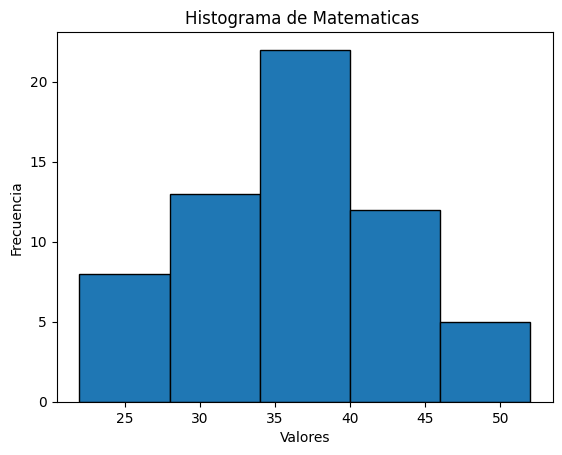

In [88]:
import matplotlib.pyplot as plt

plt.hist(datos, bins=bins, edgecolor="black")
plt.title(f"Histograma de {columna}")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()